In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\credit card\data\cdata.csv')

In [4]:
df1 = df[['Customer_Age', 'Dependent_count', 'Income', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']]

In [5]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [6]:
df2 = df1[['Avg_Utilization_Ratio', 'Income']]

In [7]:
np.random.seed(4)
dev = np.random.rand(len(df2)) <= 0.95

In [8]:
big = df2[dev]
df3 = df2[~dev]

In [9]:
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))] 

score

C:\Users\odarc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[-597523037043.0712,
 -155626326980.1478,
 -68214260805.944855,
 -37445587590.08002,
 -24365151227.38267,
 -17059454320.000988,
 -12264009118.273056,
 -9381041435.098347,
 -6996958516.910753]

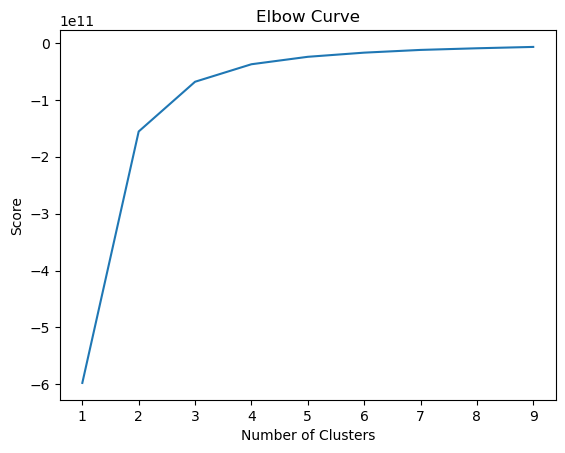

In [10]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [11]:
kmeans = KMeans(n_clusters = 4) 

In [12]:
kmeans.fit(df3)

KMeans(n_clusters=4)

In [13]:
df3['clusters'] = kmeans.fit_predict(df3)

C:\Users\odarc\AppData\Local\Temp\ipykernel_20596\2121862071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clusters'] = kmeans.fit_predict(df3)


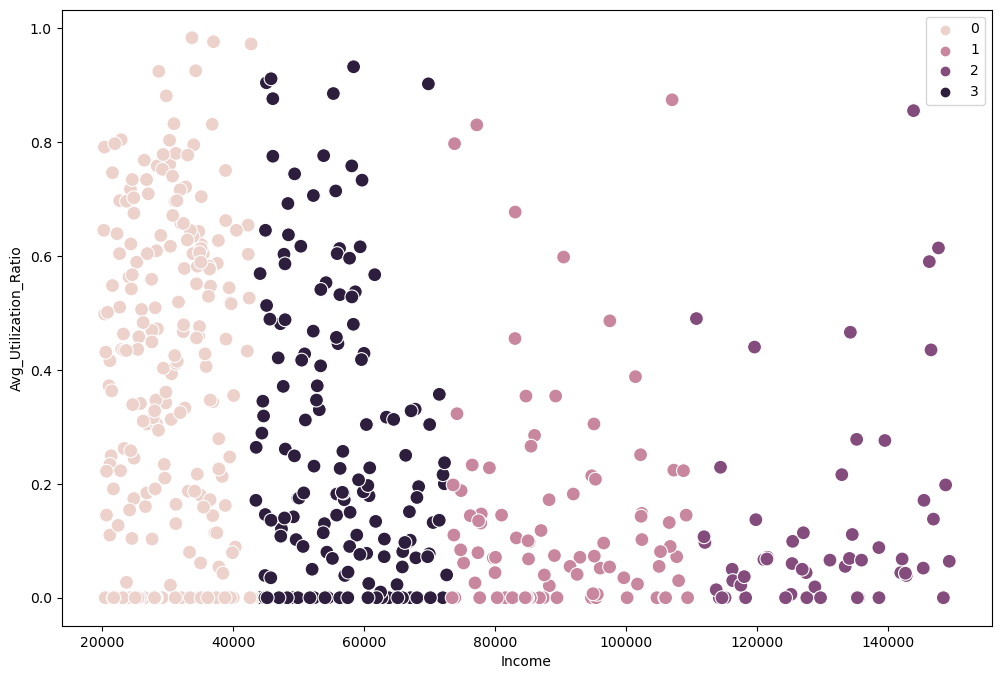

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Income'], y=df3['Avg_Utilization_Ratio'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Income') 
plt.ylabel('Avg_Utilization_Ratio') 
plt.show()

In [19]:
df3.loc[df3['clusters'] == 2, 'cluster'] = 'dark purple'
df3.loc[df3['clusters'] == 1, 'cluster'] = 'purple'
df3.loc[df3['clusters'] == 0, 'cluster'] = 'pink'
df3.loc[df3['clusters'] == 3, 'cluster'] = 'blue'

In [17]:
df3.groupby('cluster').agg({'Avg_Utilization_Ratio':['mean', 'median'], 
                         'Income':['mean', 'median']}) 

Avg_Utilization_Ratio                Income          
                             mean median           mean    median
cluster                                                          
blue                     0.260083  0.179   56338.343949   56248.0
dark purple              0.125052  0.062  129935.982759  129200.0
pink                     0.364115  0.363   30594.057269   30604.0
purple                   0.142652  0.079   89723.662921   87482.0